In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df= pd.read_csv('genres.csv')
df

C:\Users\adeel\AppData\Local\Temp\ipykernel_12856\1596605879.py:14: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('genres.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [2]:
df.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [4]:
df.isnull()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
42301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
42302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
42303,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [5]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

filling the nan values of 'song_name' with 0

In [6]:
df["song_name"].fillna("0", inplace=True)
df.fillna("0", inplace=True)

In [7]:
df.drop(columns="Unnamed: 0", axis=1,inplace=True)

In [8]:
df['title'].fillna('bfill',inplace=True)

In [9]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
song_name           0
title               0
dtype: int64

viulization and analysis

In [10]:
import matplotlib.pyplot as plt


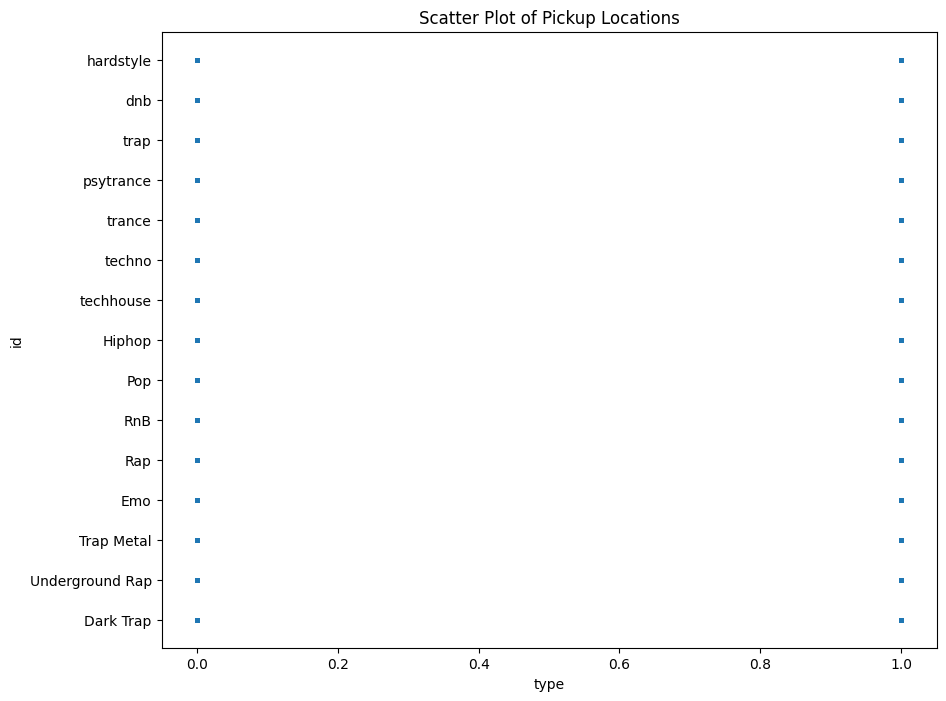

In [11]:
plt.figure(figsize=(10, 8))
                    
plt.scatter(df['mode'], df['genre'], s=5)
plt.xlabel('type')
plt.ylabel('id')
plt.title('Scatter Plot of Pickup Locations')
plt.show()

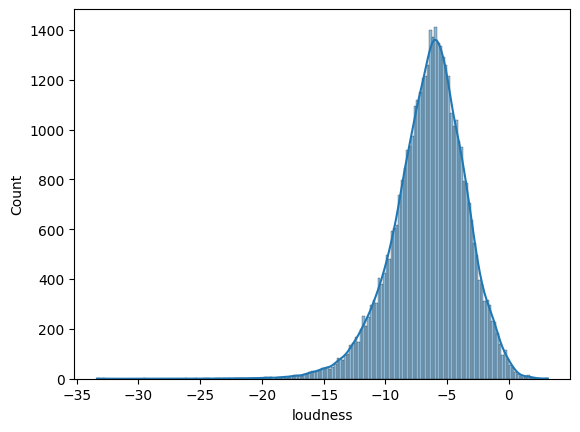

In [12]:
import seaborn as sns

sns.histplot(df['loudness'],kde=True)
plt.show()

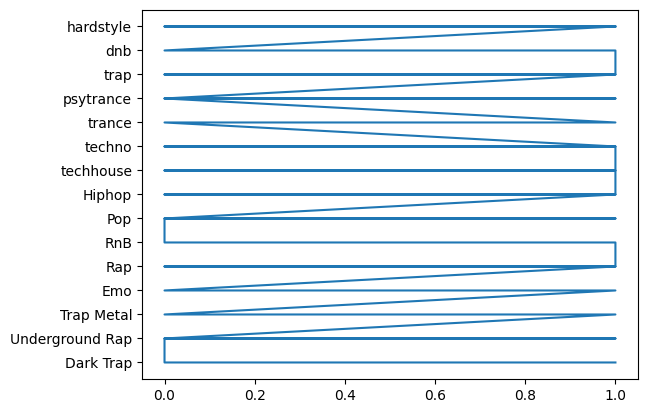

In [13]:
plt.plot(df['mode'],df['genre'])


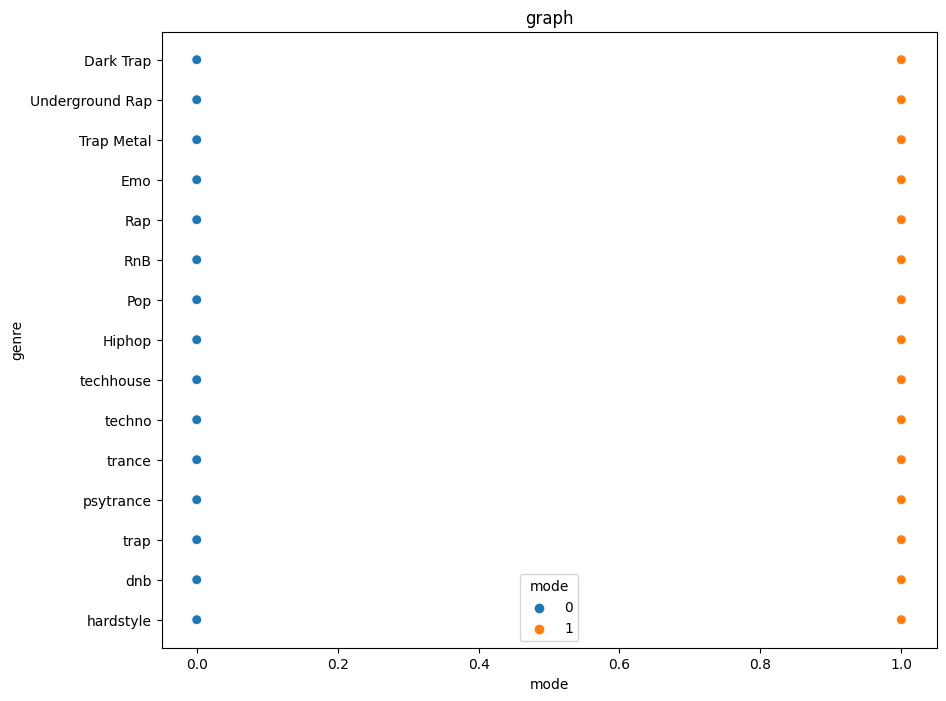

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='mode',y='genre',hue='mode',s=50,data=df)
plt.xlabel('mode')
plt.ylabel('genre')
plt.title('graph')
plt.show()


In [15]:
order=df['genre'].value_counts().index

In [16]:
df['genre'].value_counts().index

Index(['Underground Rap', 'Dark Trap', 'Hiphop', 'trance', 'trap', 'techhouse',
       'dnb', 'psytrance', 'techno', 'hardstyle', 'RnB', 'Trap Metal', 'Rap',
       'Emo', 'Pop'],
      dtype='object', name='genre')

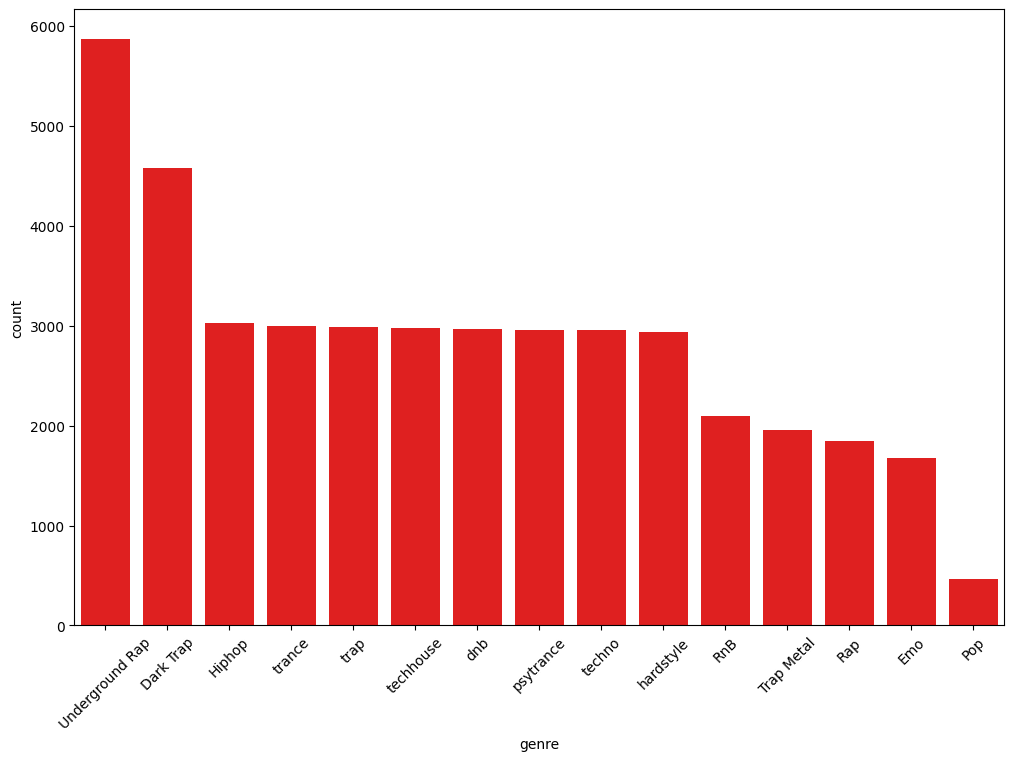

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x='genre', data=df, color='red', order=df['genre'].value_counts().index)
plt.xticks(rotation=45);

In [18]:
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
correlation_matrix = df[numerical_features].corr()

### Visualization and Analysis

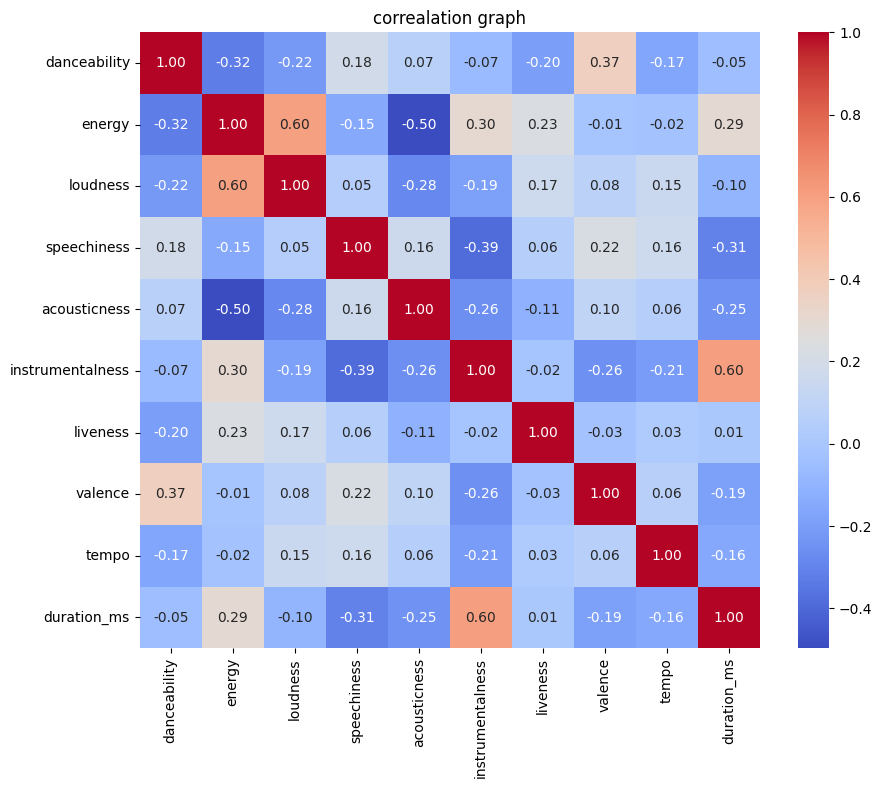

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('correalation graph')
plt.show()

Feature Engineering

Encoding Catagorical variables like Key & Mode  (using 1 hot encoding)

In [20]:
df["key"].unique()

array([ 2,  8,  5,  0,  1, 11, 10,  6,  7,  9,  4,  3], dtype=int64)

In [21]:
df["mode"].unique()

array([1, 0], dtype=int64)

Encoding Categorical Variable

In [22]:
df= pd.get_dummies(df, columns=["key", "mode"])
df.head(3)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1
0,0.831,0.814,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,...,False,False,False,False,False,False,False,False,False,True
1,0.719,0.493,-7.230,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,...,False,False,False,False,True,False,False,False,False,True
2,0.850,0.893,-4.783,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,...,False,True,False,False,False,False,False,False,False,True


Checking the count of Genre

In [23]:
df["genre"].value_counts()

genre
Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: count, dtype: int64

visualizing the Genre using CountPlot

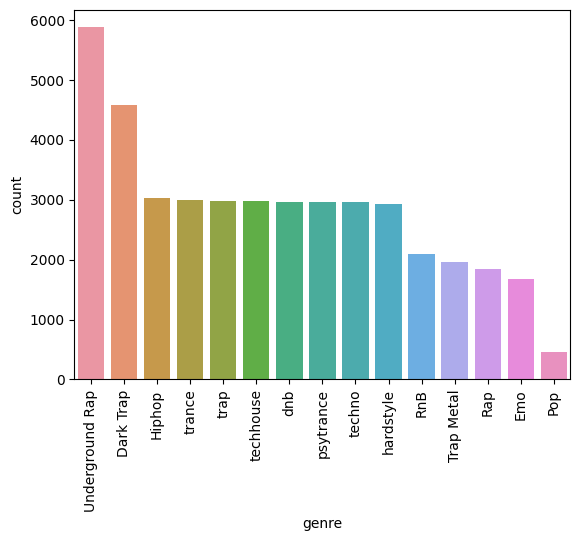

In [24]:
sns.countplot(x="genre", data=df, order= df["genre"].value_counts().index )
plt.xticks(rotation=90)
plt.show()

Min and Max scaling of Numerical Features

In [25]:
Scalar = MinMaxScaler()

numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


df[numerical_features]= Scalar.fit_transform(df[numerical_features])

converting duration from ms to minutes

In [26]:
df["duration_Minutes"] = df["duration_ms"] / 60000

Loudness into categories and Aloting Numbers

In [27]:
df['loudness_bin'] = pd.cut(df['loudness'], bins=5, labels=['very soft', 'soft', 'moderate', 'loud', 'very loud'])

In [28]:
labels=['very soft', 'soft', 'moderate', 'loud', 'very loud']

loudness_mapping = {label: i for i, label in enumerate(labels)}

df["loudness Encoded"] = df["loudness_bin"].map(loudness_mapping)

df.head(3)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,...,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,duration_Minutes,loudness_bin,loudness Encoded
0,0.829884,0.813955,0.712039,0.430304,0.060525,0.013549,0.045943,0.382028,0.610006,audio_features,...,False,False,False,False,False,False,True,0.000002,loud,3
1,0.708527,0.492877,0.715710,0.061410,0.405870,0.000000,0.109792,0.108635,0.351848,audio_features,...,False,True,False,False,False,False,True,0.000004,loud,3
2,0.850471,0.892974,0.782742,0.042890,0.013967,0.000004,0.369692,0.021046,0.986200,audio_features,...,False,False,False,False,False,False,True,0.000001,loud,3


Text to Nummeric representation of features

In [29]:

# Create a TF-IDF vectorizer for 'genre' and 'song_name'
tfidf_vectorizer = TfidfVectorizer(max_features=5)

# Transform 'genre' and 'song_name' into numerical features
genre_tfidf = tfidf_vectorizer.fit_transform(df['genre'])
song_name_tfidf = tfidf_vectorizer.fit_transform(df['song_name'])

# Convert the sparse matrices to DataFrames and concatenate them with the original data
genre_df = pd.DataFrame(genre_tfidf.toarray(), columns=[f'genre_tfidf_{i}' for i in range(5)])
song_name_df = pd.DataFrame(song_name_tfidf.toarray(), columns=[f'song_name_tfidf_{i}' for i in range(5)])

df = pd.concat([df, genre_df, song_name_df], axis=1)

In [30]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,...,genre_tfidf_0,genre_tfidf_1,genre_tfidf_2,genre_tfidf_3,genre_tfidf_4,song_name_tfidf_0,song_name_tfidf_1,song_name_tfidf_2,song_name_tfidf_3,song_name_tfidf_4
0,0.829884,0.813955,0.712039,0.430304,0.060525,0.013549,0.045943,0.382028,0.610006,audio_features,...,0.791228,0.0,0.0,0.611521,0.0,0.0,0.0,0.0,0.0,0.0
1,0.708527,0.492877,0.715710,0.061410,0.405870,0.000000,0.109792,0.108635,0.351848,audio_features,...,0.791228,0.0,0.0,0.611521,0.0,0.0,0.0,0.0,0.0,0.0
2,0.850471,0.892974,0.782742,0.042890,0.013967,0.000004,0.369692,0.021046,0.986200,audio_features,...,0.791228,0.0,0.0,0.611521,0.0,0.0,0.0,0.0,0.0,0.0
3,0.445227,0.780947,0.784742,0.086971,0.023987,0.000000,0.105699,0.161250,0.794595,audio_features,...,0.791228,0.0,0.0,0.611521,0.0,0.0,0.0,0.0,1.0,0.0
4,0.794127,0.623909,0.703712,0.292754,0.219635,0.000000,0.158907,0.590426,0.554579,audio_features,...,0.791228,0.0,0.0,0.611521,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.501571,0.692925,0.772743,0.008340,0.031882,0.000349,0.112862,0.387187,0.567055,audio_features,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
42301,0.489652,0.767944,0.696754,0.027293,0.022772,0.000018,0.198813,0.375838,0.566531,audio_features,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
42302,0.320620,0.820956,0.828791,0.030109,0.026315,0.000245,0.382994,0.108635,0.597377,audio_features,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
42303,0.446311,0.920981,0.782906,0.017871,0.000557,0.029929,0.047887,0.484164,0.567233,audio_features,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Machine Learning Model Implementation

### Linear Regression on DF["energy"] 
> Target is DF["loudness"]

In [31]:
model = LinearRegression()


X = df["energy"].to_numpy()
X = X.reshape(-1,1)   
Y = df["loudness"].to_numpy()

model.fit(X, Y)

LinearRegression()

In [32]:
X_new = np.array([0.5]).reshape(-1,1)
Y_pred = model.predict(X_new)
print(f"Predicted on X_new {Y_pred}")

pred = model.predict(X)
mse = mean_squared_error(Y, pred)
mse

Predicted on X_new [0.66747332]


0.0041423463911692444

## Logistic Regression which used to predict Binary Classification

In [33]:
X = df[["energy", "liveness", "tempo", "time_signature", "valence"]]
Y = (df["loudness_bin"] == "loud").astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
Y

0        1
1        1
2        1
3        1
4        1
        ..
42300    1
42301    1
42302    0
42303    1
42304    1
Name: loudness_bin, Length: 42305, dtype: int32

In [34]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [35]:
Y_pred = model.predict(X_test)
Accuracy = accuracy_score(Y_pred, y_test)
Accuracy

0.7300661834226284